## Calcul pour le potentiomètre

- Equation du potentiomètre linéaire
$$ R(\theta)=R_P \cdot \frac{\theta }{\theta_{max}} $$
- Effet de charge
- Potentiomètre logarithmique

## Effet de charge

Si la mesure sur le curseur a une résistance R en parallèle. On définit $\rho$ comme étant la position relative du curseur. On a $0<=\rho<=1$.

In [1]:
import sympy as sp
sp.init_printing()
rho,RP,Rc, U=sp.symbols('rho,R_P,R_c,U')

On sépare le potentiomètre en une résistance supérieure $R_{up}=R_P \cdot (1-\rho)$ et une résistance inférieure 
$R_{down}=R_P \cdot \rho$.
La résistance inférieure est en parallèle avec la résistance de charge $R_c$. Pour mettre en parallèle 2 résistances, on utilise la 
relation 
$$ R_{eq}=\frac{\rho R_P  \cdot R_C}{ \rho R_P + R_C} $$

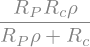

In [2]:
Req=RP*rho*Rc/(RP*rho+Rc)
Req

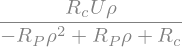

In [3]:
Uout=U*Req/(RP*(1-rho)+Req)
sp.simplify(Uout)

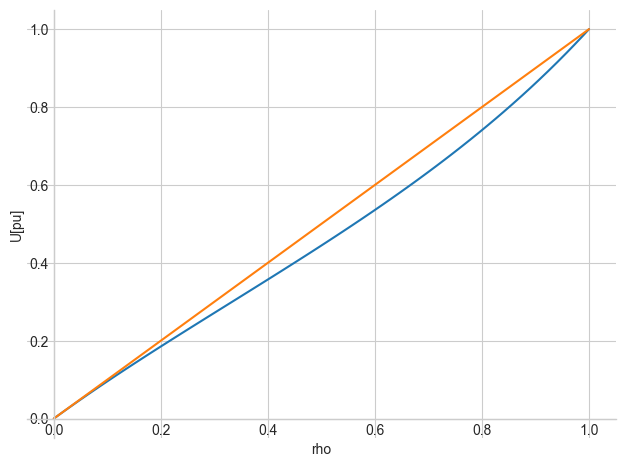

In [4]:
import matplotlib as plt
from matplotlib import style
style.use('seaborn-v0_8-whitegrid')

valeurs={U:1, RP:1000, Rc:2000}
fig=sp.plot(Uout.subs(valeurs), (U*rho).subs(valeurs),(rho,0,1), xlabel="rho", ylabel="U[pu]")

## Potentiomètre logarithmique

Le potentiomètre est constitué d'une piste d'épaisseur $e$ et de largeur $h$ qui augmente linéairement. Si la largeur augmente selon la formule $h(x)=h0+\alpha x$.

Un élément de résistance est donné par
$$
dR(x)=\rho_c \cdot dx/(h(x) \cdot e)
$$

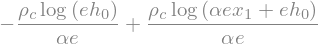

In [8]:
h0,h1,e,x,x1, rho_c, x_max, alpha=sp.symbols('h_0,h_1,e,x,x1,rho_c,x_max, alpha', positive=True)
h=h0+x*alpha
DR=rho_c/(e*h)
Rx1=sp.integrate(DR,(x,0,x1))
Rx1

On en déduit une relation pour $R_P$ :
$$
R_P=\frac{\rho_c}{\alpha e} \log{\frac{\alpha x1 + h0}{h0}}
$$

Le rapport entre $R(x)$ et $R_P$ donne ceci :

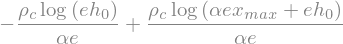

In [6]:
xmax=sp.symbols('x_max')
R_P=Rx1.subs(x1,xmax)
R_P

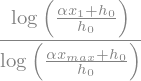

In [7]:
rapportR_RP=Rx1/R_P
sp.simplify(rapportR_RP)

Si on veut une relation sans allusion à $x1$, mais à un coefficient $\rho$, on a la relation 
$$
h2(\rho)=h(x) 
$$
Si $\rho=\frac{x}{x_{max}}$, on a
$$
R2(\rho)=\frac{\rho_c}{\alpha e} \log{\frac{\alpha \rho x_{max} + h0}{h0}}
$$
On aimerait connaître la valeur de $R(\rho)$ sous la forme $R(\rho)=R_P*f(\rho)$.

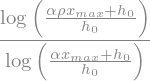

In [8]:
rR=sp.log((alpha*rho*xmax+h0)/h0)/sp.log((alpha*xmax+h0)/h0)
sp.simplify(rR)

La valeur sous la fraction dépend de facteur de fabrication. On pose 
$K=\frac{1}{\log{\frac{\alpha x_{max} + h0}{h0}}}$. 

Ce qui permet d'écrire :
$$
\frac{R(\rho)}{R_P} = K \cdot \log{ \frac{\alpha x_{max} \cdot \rho + h0 }{h0}} 
$$

## Autre formulation du calcul

Autre présentation du problème, selon l'image du cours. On pose $h(x)=\alpha x$, et on intègre de x0 à x1.

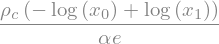

In [9]:
x0=sp.symbols('x0')
h=alpha*x
DR=rho_c/(e*h)
Rx1=sp.integrate(DR,(x,x0,x1))
sp.simplify(Rx1)

On a pour R(x1) une valeur
$$ R(x1) = \frac{\rho_c}{e_1 h}\log(\frac{x_1}{x_0}) $$

On a pour $R_P$ une valeur qui est donnée lorsque $x1=x_{max}$ :
$$ R_P = \frac{\rho_c}{e_1 h}\log(\frac{x_{max}}{x_0}) $$
Le rapport entre la tension et la position du curseur est donc :

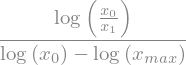

In [10]:
R_P=Rx1.subs(x1,xmax)
rUout=sp.simplify(Rx1/R_P)
rUout

On peut reformuler cette équation pour obtenir
$$
R(x1)/R_P=\frac{log(x0/x1)}{log(x0/x_{max})}
$$
La valeur de la tension de sortie suit une caractéristique logarithmique

La valeur de la tension de sortie suit une caractéristique logarithmique avec une forte variation d'un côté et une plus faible variation de l'autre. Ceci est illustré sur la figure suivante.

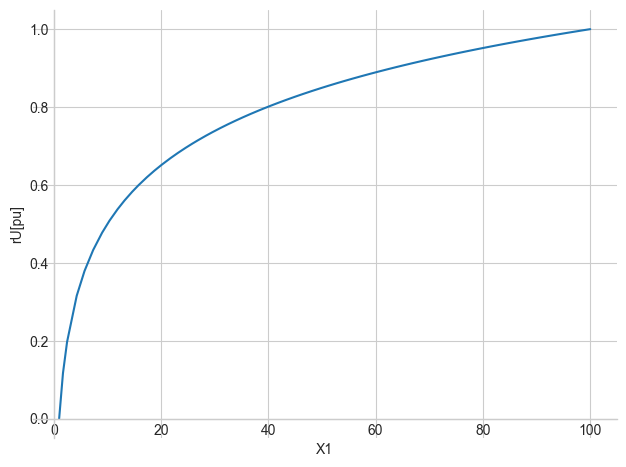

In [11]:
M=100
fig=sp.plot(rUout.subs({x0:1, xmax:M}),(x1,1,M), xmin=0, xmax=M, xlabel="X1", ylabel="rU[pu]")

Si on branche le potentiomètre dans l'autre sense, on peut inverser la caractéristique.

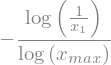

In [12]:
rUout.subs({x0:1, x_max:M})

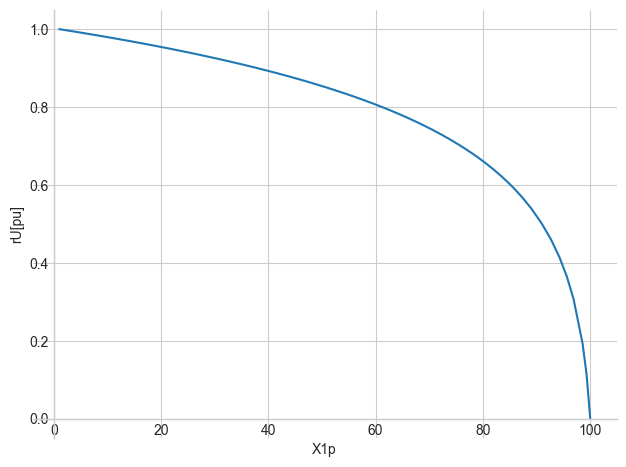

In [13]:
x1p=sp.symbols('x1p')
rUout2=rUout.subs(x1,xmax-x1p+x0)
fig=sp.plot(rUout2.subs({x0:1, xmax:M}),(x1p,1,M), xmin=0, xmax=M, xlabel="X1p", ylabel="rU[pu]")